# Free Fall

To solve a 2nd order ODE, you need to conver it to a system of two 1st order ODEs. The dependent variables are the function and its derivative, so in general, a 2nd order ODE can be written<br>
$$\frac{d^2y}{dt^2}=f(t,y,y').$$
We can write this as a system of two 1st order ODEs for the two dependent variables $y$ and $y'$:
$$\frac{dy}{dt}=y'$$
$$\frac{dy'}{dt}=f(t,y,y')$$
The first equation is just the definition of $y'$ and the second is our original ODE.

For Newton's second law, this is very intuitive. $F=ma$ for a constant mass becomes the 2nd order ODE 

$$\frac{d^2x}{dt^2} = \frac{F(t,x,x')}{m}$$

But if we write this in terms of two variables, $x$ and $v=x'$, it becomes the sytem
$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = \frac{F(t,x,x')}{m}$$
As above, the first equation is just the definition of $v$ and the second is our original 2nd order ODE written as a 1nd order ODE in $v$.
<br><br>
To illustrate, consider a falling object with air resistance. It has two forces acting on it, gravity and drag. Gravity is just $F_g=-mg$. Let's assume drag is opposite the direction of velocity and proportional to $v^2$ with drag coeeficient $c$, so the crag force is $F_d=-cv^2$ for $v>0$. Let We can code this up as follows:

In [1]:
from numpy import linspace,array,arange, log,exp,sin,cos,sqrt, pi, zeros, ones, sign
import numpy as np

g = 9.81
c = 0.2 # Drag coefficient
m = 10 # kg

def falling( t, X ):
    """
    RATE_FUNC for Newton's 2nd Law  F = ma
    
    2nd order ODE 
    a = d2x/dt2 = F/m
    
    System of 2 1st order ODE
    dv/dt = F/m
    dy/dt = v
    """
#  unpack
    y = X[0] # position
    v = X[1] # velocity
        
    # compute forces
        
    Gravity = -m*g
    Drag = -sign(v)*c*v**2
    F = Gravity + Drag # Net Force
        
    # Compute acceleration according to Newton's second law
        
    a = F/m # acceleration
        
    # compute derivatives
    dy = v
    dv = a
        
    # pack rate array
    rate = array([dy, dv])
        
    return rate

This function take three input values (t, y, v) and returns two output values, the rates of change of y and v. For convienience, y and v are passed in the array X; dy dv are passed in the array rate. Note that we could have just set <pre>rate = array([v,a])</pre> but I wrote it this way to emphasize the logic.
<br><br>
So to solve this, first we need to define the initial conditions. Let's start at a height of $100\ m$ and toss our mass upward at $20\ m/s$ Since there are two variables, the i.c. will go into an array, Y0:

In [2]:
# set some initial conditions
y0 = 100
v0 = 20
Y0 = array([y0, v0]) # pack the i.c. into a column vector

Now define an array of times at which we want to find the solution, starting with the time where the i.c. applies.

In [3]:
# set the time interval for solving
Tstart=0
Tend = 10 # s

# Form Time array
T = linspace(Tstart,Tend,100)

Use odeint from scipy to solve. Note the tfirst=True flag to match how we defined <b>falling</b> above. The solution returned by odeint is an array with two columns and one row for each time step in T. Look at <b>falling</b>: y is first and v is second, so we follow that here when we "unpack" the columns.

In [4]:
# solve the ODE
from scipy.integrate import odeint
X = odeint(falling, Y0, T, tfirst=True)

# unpack the results. In the output array, variables are columns, times are rows
y = X[:,0]
v = X[:,1]

Now make some nice plots.

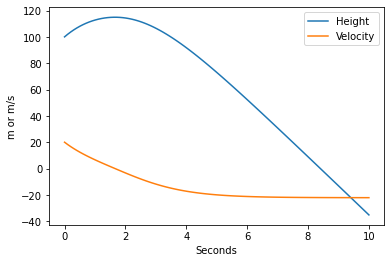

In [5]:
# make some nice plots
from matplotlib.pyplot import plot,xlabel,ylabel,legend,show, figure, subplot, xlim

plot (T,y, label='Height')
plot (T,v, label='Velocity')
xlabel('Seconds')
ylabel('m or m/s')
legend()

Notice how velocity stabilizes with time due to drag. Try changing the i.c. or drag coefficient and try again.